# DATA EXPLORATION - Advanced study of epigenetic mechanisms in the development of neoplasms 

In this notebook, the goal is to **gain an initial understanding of the medical and biological concepts** by **exploring and visualizing the data** in its raw form, allowing me to examine its structure and fundamental characteristics.


### Libraries


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
from scipy.stats import median_abs_deviation
import warnings
from sklearn.decomposition import IncrementalPCA
from sklearn.manifold import TSNE

## Overview of Cancer, Breast Cancer, and the Role of DNA Methylation

**Cancer** encompasses a group of more than one hundred diseases characterized by the **uncontrolled division and proliferation of cells** within the body. These conditions can arise in almost every tissue and share common biological mechanisms underlying their development and progression. Cancer originates when a single cell **loses the regulatory controls** that normally govern its division, resulting in **unrestricted cellular proliferation** and the formation of an abnormal mass of cells known as a **tumor**. Depending on its behavior, a tumor can remain **localized** to its original tissue (in situ cancer) or **invade** surrounding tissues and spread through the **bloodstream** or **lymphatic system**, forming **metastases** in distant organs **[1]**.

A tumor or **neoplasm**—from the Greek *neo-* (“new”) and *-plasis* (“formation”)—refers to this abnormal and excessive growth of tissue **[2]**. **Neoplasms** are broadly classified as **benign** or **malignant**. **Benign neoplasms**, such as *fibroids* and *adenomas*, are non-cancerous and typically remain confined, though they can cause complications depending on their location or size. **Malignant neoplasms**, in contrast, exhibit the capacity to **invade surrounding tissues** and **metastasize**, and are therefore considered **cancers**. The transition from a benign to a malignant state is usually driven by **genetic mutations** that alter the normal regulation of cell division, leading to uncontrolled cell proliferation.

**Cancer becomes life-threatening when tumor growth interferes with essential organs or physiological functions.** Advances in molecular biology have significantly deepened our understanding of cancer by enabling detailed analyses of cellular and genetic alterations. This knowledge has driven the development of innovative diagnostic tools, preventive measures, and targeted therapeutic strategies that address the molecular underpinnings of cancer **[1]**.

Among the various cancer types, **breast cancer** is the **most commonly diagnosed malignancy in women** and the **second leading cause of cancer-related mortality** worldwide **[3]**. Anatomically, the breasts are paired glands located superficially to the pectoralis major muscle, composed of **lobules** containing milk-producing **acini** that converge into **lobes** interspersed with adipose tissue. Milk is secreted through **lactiferous ducts** that terminate at the nipple, while **Cooper’s ligaments** provide structural support by anchoring the breast to the underlying fascia. Most breast cancers arise in the **ductal epithelium** (*ductal carcinoma*), though some originate in the **lobular epithelium** (*lobular carcinoma*).

Several **risk factors** contribute to breast cancer development, including **age**, **gender**, **personal and family history of breast cancer**, **histologic abnormalities**, **reproductive history**, and **exogenous hormone exposure**. The incidence of breast cancer increases with age, and most cases occur in women. A prior history of breast cancer significantly raises the likelihood of developing a new primary tumor in the contralateral breast. Approximately **5%–10%** of breast cancer cases have a **hereditary basis**, often linked to mutations in the **BRCA1** and **BRCA2** genes, which markedly elevate susceptibility to the disease. Reproductive factors that increase lifetime exposure to **estrogen**, such as **early menarche**, **late first childbirth**, **nulliparity**, and **late menopause**, are associated with elevated risk. Likewise, **exogenous hormone therapy** involving estrogen and progesterone has been shown to further increase this risk. Breast cancer is typically diagnosed through **physical examination**, **breast imaging**, and **biopsy**, while treatment approaches include **surgery**, **chemotherapy**, **radiation**, **hormonal therapy**, and, increasingly, **immunotherapy**. Personalized treatment decisions are guided by factors such as **tumor histology**, **stage**, **molecular markers**, and **genetic alterations** **[3]**.

At the molecular level, one of the most critical epigenetic mechanisms implicated in cancer is **DNA methylation**, which plays a central role in regulating gene expression, maintaining genome stability, and determining cellular identity **[4]**. **DNA methylation** involves the addition of a **methyl group** to the **5′ position of cytosine residues**, primarily within **CpG dinucleotides**—DNA regions where a **cytosine (C)** is followed by a **guanine (G)** nucleotide, connected by a **phosphodiester bond**. The notation “**CpG**” designates this specific 5′-C—G-3′ sequence, where the “p” denotes the phosphodiester linkage **[5]**. Regions with a **high density of CpG sites**, termed **CpG islands**, are frequently found in **gene promoter regions**, where methylation typically acts to **silence gene transcription** by impeding the binding of transcription factors and other regulatory proteins. Conversely, **unmethylated promoter regions** are generally associated with **active gene expression**.

These methylation patterns are **heritable** through cell divisions, forming the basis of **epigenetic memory** and ensuring the maintenance of cell-specific gene expression programs across generations **[4]**. However, in cancer, **methylation homeostasis is frequently disrupted**. **Hypermethylation** of promoter-associated CpG sites in **tumor suppressor genes** can result in their silencing, thereby facilitating unregulated cell proliferation. In contrast, **hypomethylation** in other genomic regions may lead to **activation of oncogenes**, promoting genomic instability and tumor progression **[5]**. Such aberrant methylation dynamics have been implicated in multiple cancers, including breast cancer, where silencing of genes involved in **DNA repair** and **tumor suppression** contributes to **malignant transformation**.

The study of **neoplasia**—with particular emphasis on **genetic** and **epigenetic** mechanisms such as **DNA methylation**—is fundamental for understanding cancer initiation and progression. Genetic mutations and disrupted CpG methylation patterns jointly compromise normal cellular regulation, fostering the development of **malignant phenotypes**. By elucidating these molecular processes, modern oncology can improve **diagnostic precision**, **therapeutic targeting**, and **preventive interventions** aimed at reducing the global burden of cancer.


## Dataset

### Dataset information
The **GSE69914** dataset, available from the **Gene Expression Omnibus (GEO)** database, contains **DNA methylation profiling** data obtained from the **Illumina Infinium 450k Human Methylation Beadchip**. The dataset includes methylation profiles of approximately **480,000 CpG sites** across **407 samples** from various tissue types. These samples include **50 normal breast tissues**, **42 matched normal-adjacent breast cancer pairs (84 samples)**, **263 unmatched breast cancer samples**, and **7 normal samples from BRCA1 carriers** alongside **4 BRCA1 breast cancer samples**.

The experiment involved **bisulfite-converted DNA** that was hybridized to the Illumina platform, enabling the profiling of DNA methylation patterns associated with normal and cancerous breast tissues. The dataset provides insights into the **epigenetic landscape** of **ER-positive breast cancer**, with a focus on **field defects** and how DNA methylation alterations can serve as potential biomarkers for cancer progression.

Key details:

* **Experiment type**: Methylation profiling by genome tiling array.
* **Organism**: Homo sapiens (Human).
* **Contributor(s)**: Teschendorff A, Widschwendter M.
* **Platform**: Illumina HumanMethylation450 BeadChip.

**Dataset link**: [GSE69914 on GEO](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=gse69914)

**Status**: Public as of Jun 18, 2015

This dataset is invaluable for studying the role of **DNA methylation** in breast cancer and normal tissues, offering a comprehensive resource for research in **epigenomics** and **oncology** **[6]**.

The **GSE69914** dataset includes several types of breast tissue samples, such as **normal tissues**, **normal-adjacent tissues**, and **breast cancer samples**, each serving a different purpose in understanding the genetic and epigenetic landscape of breast cancer. **Normal tissues** are collected from individuals without breast cancer, typically used as baseline controls for comparison with tumor samples. **Normal-adjacent tissues** are taken from areas adjacent to the tumor within the same patient. These tissues are often assumed to reflect early, subtle epigenetic changes caused by the tumor microenvironment, even before the development of cancer. On the other hand, **breast cancer samples** can be categorized into **unmatched** and **matched** types. **Unmatched cancer samples** are tumor tissues collected without corresponding normal tissue from the same individual, while **matched cancer samples** come from patients where both normal and tumor tissues are collected for comparison, which allows researchers to identify specific epigenetic changes associated with tumor development. The dataset also includes **BRCA1-related samples**, from patients who carry mutations in the **BRCA1 gene**. The **BRCA1 gene** is a tumor suppressor gene, and mutations in it significantly increase the risk of developing breast cancer and ovarian cancer. These samples provide valuable insights into the epigenetic alterations in individuals with inherited cancer susceptibility.

The diversity of tissue samples in this dataset allows for a comprehensive analysis of DNA methylation profiles, particularly in the context of cancer progression, the tumor microenvironment, and genetic predispositions such as BRCA1 mutations **[7]**.


Now let's import the **dataset** downloaded from the **GEO (Gene Expression Omnibus)** database [GSE69914](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=gse69914), available in *Series Matrix File (.txt)* format. The file has been converted to a *CSV* format without any other modifications and uploaded to **Kaggle** for easier access and use within this notebook.

In [2]:
# Find dataset's path 
file_path = '/kaggle/input/raw-dataset/GSE69914_series_matrix.csv'  # file's path
raw_dataset = pd.read_csv(file_path)

In [3]:
# View the first few rows of the dataset
raw_dataset.head()

,ID_REF,GSM1712367,GSM1712368,GSM1712369,GSM1712370,GSM1712371,GSM1712372,GSM1712373,GSM1712374,GSM1712375,...,GSM1712770,GSM1712771,GSM1712772,GSM1712773,GSM1712774,GSM1712775,GSM1712776,GSM1712777,GSM1712778,GSM1712779
0,cg00000029,0.258254,0.197553,0.275187,0.150849,0.240538,0.249905,0.378757,0.474699,0.363260,...,0.273695,0.204416,0.250100,0.117792,0.079539,0.242573,0.117149,0.201398,0.216148,0.569178
1,cg00000108,0.986116,0.981426,0.972137,0.984434,0.987393,0.958457,0.984781,0.988312,0.971297,...,0.978810,0.955072,0.972645,0.971132,0.982360,0.973398,0.926971,0.974608,0.976362,0.984590
2,cg00000109,0.889916,0.826830,0.839431,0.950852,0.897285,0.814509,0.898999,0.903172,0.920438,...,0.844270,0.878550,0.852844,0.895050,0.930519,0.900096,0.625678,0.810017,0.889987,0.919995
3,cg00000165,0.247964,0.343906,0.216030,0.576088,0.616293,0.238897,0.243838,0.460061,0.429162,...,0.224468,0.303041,0.237599,0.273763,0.903569,0.367987,0.380380,0.246235,0.410192,0.282906
4,cg00000236,0.902621,0.868874,0.837979,0.931236,0.915173,0.827905,0.905214,0.918090,0.886167,...,0.929749,0.932601,0.860249,0.937596,0.939224,0.930300,0.784228,0.908534,0.911480,0.923068


In [4]:
# Delete the first column relating to the CpG index
raw_dataset.set_index('ID_REF', inplace=True)
raw_dataset.head()

,GSM1712367,GSM1712368,GSM1712369,GSM1712370,GSM1712371,GSM1712372,GSM1712373,GSM1712374,GSM1712375,GSM1712376,...,GSM1712770,GSM1712771,GSM1712772,GSM1712773,GSM1712774,GSM1712775,GSM1712776,GSM1712777,GSM1712778,GSM1712779
ID_REF,,,,,,,,,,,,,,,,,,,,,
cg00000029,0.258254,0.197553,0.275187,0.150849,0.240538,0.249905,0.378757,0.474699,0.363260,0.332967,...,0.273695,0.204416,0.250100,0.117792,0.079539,0.242573,0.117149,0.201398,0.216148,0.569178
cg00000108,0.986116,0.981426,0.972137,0.984434,0.987393,0.958457,0.984781,0.988312,0.971297,0.981409,...,0.978810,0.955072,0.972645,0.971132,0.982360,0.973398,0.926971,0.974608,0.976362,0.984590
cg00000109,0.889916,0.826830,0.839431,0.950852,0.897285,0.814509,0.898999,0.903172,0.920438,0.856352,...,0.844270,0.878550,0.852844,0.895050,0.930519,0.900096,0.625678,0.810017,0.889987,0.919995
cg00000165,0.247964,0.343906,0.216030,0.576088,0.616293,0.238897,0.243838,0.460061,0.429162,0.195441,...,0.224468,0.303041,0.237599,0.273763,0.903569,0.367987,0.380380,0.246235,0.410192,0.282906
cg00000236,0.902621,0.868874,0.837979,0.931236,0.915173,0.827905,0.905214,0.918090,0.886167,0.956775,...,0.929749,0.932601,0.860249,0.937596,0.939224,0.930300,0.784228,0.908534,0.911480,0.923068


#### Dataset description
Based on the description of the dataset in *Epigenetic Mechanisms in the Development of Neoplasms (Nastaran Ahmadi Bonakdar's thesis)* and the *GSE69914 study*, the rows and columns of the dataset have specific biological meanings.

**Rows:** Each row corresponds to a **CpG site** (a location where a cytosine nucleotide is followed by a guanine nucleotide in the DNA sequence). The dataset consists of methylation measurements for thousands of these CpG sites, with a particular focus on breast tissue samples, including cancerous, adjacent-normal, and normal tissues.

**Columns:** Each column corresponds to a **sample**, which represents different tissue types (normal, adjacent-normal, and cancer). The samples include both *breast cancer* tissues and various *normal* and *adjacent-normal* tissues. These samples were collected from different individuals, including those with genetic mutations such as BRCA1, which are known to influence breast cancer risk.

**Values:** The values in the dataset represent **methylation beta-values**, which indicate the degree of DNA methylation at each CpG site for each sample. These values range from **0 to 1**:

* **0** indicates no methylation (unmethylated CpG site).
* **1** indicates complete methylation (fully methylated CpG site).

Methylation levels are crucial for gene regulation, and abnormal methylation patterns (such as hypermethylation or hypomethylation) are often associated with diseases like cancer. In this dataset, values closer to 1 may indicate regions that are silenced (e.g., tumor suppressor genes), while values closer to 0 may indicate active regions.

1. **Silenced Regions (Hypermethylation):** Silencing refers to the repression of gene expression. In the case of methylation, when a gene is hypermethylated, it means that methyl groups have been added to the promoter region of the gene (usually a CpG island), preventing the gene from being transcribed into RNA and thus turning the gene off.In the context of tumor suppressor genes, hypermethylation in their promoter regions can prevent these genes from functioning properly, which may contribute to cancer development. For example, if a tumor suppressor gene is silenced (turned off), it won't be able to regulate cell growth, potentially leading to uncontrolled cell division and cancer.

2. **Active Regions (Hypomethylation):** Active regions refer to genes that are expressed—meaning they are actively transcribed into RNA and then translated into proteins. These genes are hypomethylated, meaning they have low or absent methylation in their promoter regions. Without the addition of methyl groups to the promoter, the gene is free to be transcribed and perform its function in the cell.For example, certain genes involved in cell division or response to signals may be active and expressed in normal tissue, but in cancer cells, hypomethylation might also occur in areas where it shouldn’t, leading to overexpression of genes that promote cancer progression. **[8]**


By analyzing these methylation values, I can identify potential biomarkers for cancer or field defects, which could serve as early indicators of cancer development.

## Data Explotaration 

#### Initial Inspection

In [5]:
# Dataset dimensions
print(f"Dataset shape: {raw_dataset.shape}" )

# Check for missing values
print(f"Missing values per columns: {sum(raw_dataset.isnull().sum())}")

Dataset shape: (485512, 407)
Missing values per columns: 0


In [6]:
# I transpose the dataset so that each row represents a sample and each column corresponds to a CpG site (feature)
raw_dataset = raw_dataset.T
raw_dataset.head()

ID_REF,cg00000029,cg00000108,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622,...,ch.X.93511680F,ch.X.938089F,ch.X.94051109R,ch.X.94260649R,ch.X.967194F,ch.X.97129969R,ch.X.97133160R,ch.X.97651759F,ch.X.97737721F,ch.X.98007042R
GSM1712367,0.258254,0.986116,0.889916,0.247964,0.902621,0.481930,0.839584,0.403095,0.205147,0.012563,...,0.026185,0.010076,0.017305,0.043877,0.164719,0.002110,0.051155,0.008278,0.058859,0.035424
GSM1712368,0.197553,0.981426,0.826830,0.343906,0.868874,0.531370,0.702531,0.170696,0.124332,0.017907,...,0.025065,0.005971,0.012350,0.034275,0.168426,0.034879,0.072710,0.051845,0.084556,0.044961
GSM1712369,0.275187,0.972137,0.839431,0.216030,0.837979,0.526388,0.761244,0.234515,0.185712,0.018421,...,0.031754,0.016593,0.019087,0.032228,0.104366,0.058810,0.029021,0.018309,0.054741,0.033543
GSM1712370,0.150849,0.984434,0.950852,0.576088,0.931236,0.602277,0.677764,0.314696,0.498028,0.020209,...,0.034745,0.006860,0.032156,0.044764,0.181600,0.029233,0.042169,0.016153,0.033154,0.038842
GSM1712371,0.240538,0.987393,0.897285,0.616293,0.915173,0.416164,0.791098,0.692240,0.525042,0.022303,...,0.035370,0.000016,0.008709,0.022681,0.108381,0.023234,0.016129,0.011282,0.045345,0.052693


In Illumina methylation microarray data, probe identifiers follow a standard naming convention that reflects the genomic context they target. Probes beginning with the prefix **“cg”** typically correspond to cytosine-guanine dinucleotides (CpG sites), which are the primary targets for DNA methylation analysis. Conversely, probes labeled with the prefix **“ch”** indicate non-CpG contexts, where “h” denotes any nucleotide other than guanine (A, C, or T). This nomenclature is a standard feature of the **Illumina HumanMethylation450 BeadChip** and related platforms, where the majority of probes measure CpG methylation, but a subset interrogates non-CpG methylation loci for broader epigenetic profiling **[9]**.


#### Descriptive Statistics

In [7]:
# Descriptive statistics
print(f"Descriptive statistics: ")
raw_dataset.describe()

Descriptive statistics: 


ID_REF,cg00000029,cg00000108,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622,...,ch.X.93511680F,ch.X.938089F,ch.X.94051109R,ch.X.94260649R,ch.X.967194F,ch.X.97129969R,ch.X.97133160R,ch.X.97651759F,ch.X.97737721F,ch.X.98007042R
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,...,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,0.287614,0.973058,0.863683,0.349965,0.898975,0.543374,0.736604,0.373064,0.300200,0.020131,...,0.029432,0.015927,0.017565,0.050392,0.187804,0.056493,0.049894,0.021562,0.058180,0.053920
std,0.116009,0.013304,0.070804,0.160281,0.046663,0.077799,0.108991,0.158636,0.154287,0.006327,...,0.007316,0.013284,0.011017,0.028720,0.074443,0.043643,0.027001,0.016530,0.014825,0.024366
min,0.044911,0.903346,0.418769,0.110071,0.582199,0.257388,0.317322,0.085897,0.080540,0.007085,...,0.012153,0.000016,0.000594,0.002790,0.043817,0.000109,0.008562,0.001364,0.027311,0.008338
25%,0.209630,0.968003,0.828533,0.235296,0.881446,0.500205,0.690217,0.248893,0.181994,0.016213,...,0.024610,0.008104,0.009849,0.031216,0.132937,0.025429,0.034200,0.011583,0.047912,0.037654
50%,0.275104,0.976092,0.879987,0.299680,0.911065,0.552557,0.749737,0.341803,0.258197,0.018987,...,0.028942,0.013263,0.015280,0.044731,0.177029,0.044770,0.043912,0.016951,0.056888,0.049882
75%,0.357203,0.981528,0.912330,0.423566,0.929232,0.593953,0.809384,0.479896,0.404939,0.023233,...,0.033283,0.018309,0.022856,0.063455,0.226902,0.075430,0.056712,0.026642,0.065928,0.063935
max,0.716476,0.992663,0.977589,0.903569,0.980395,0.761356,0.941660,0.821892,0.867365,0.060572,...,0.070128,0.139350,0.087690,0.221762,0.645543,0.285094,0.259075,0.153238,0.127947,0.185305


## Data Visualization
The aims is to explore global and group-specific methylation patterns in the GSE69914 dataset through progressive visualization.
Starting from global QC plots, I move toward group-aware distributions, outlier detection, CpG-level variability, and dimensionality reduction (t-SNE).
The goal is to understand global structure, potential biases, and early biological signals before formal preprocessing.

### 0 — Sample Grouping and Label Assignment
This step is described in detail in the following notebook: [02-data-pre-processing.ipynb](https://github.com/elisabettaroviera/THESIS/blob/main/01%20-%20Notebook/02-data-pre-processing.ipynb). It outlines how samples are grouped and labels are assigned to distinguish between *Normal*, *Adjacent*, and *Tumor* tissues.

In [8]:
# Each sample is assigned a status: normal, adjacent, tumour

# 0 - Normal
normal_samples = [
    'GSM1712369', 'GSM1712385', 'GSM1712398', 'GSM1712412', 'GSM1712419', 'GSM1712423',
    'GSM1712435', 'GSM1712439', 'GSM1712440', 'GSM1712449', 'GSM1712464', 'GSM1712472',
    'GSM1712489', 'GSM1712490', 'GSM1712504', 'GSM1712535', 'GSM1712541', 'GSM1712551',
    'GSM1712565', 'GSM1712566', 'GSM1712574', 'GSM1712578', 'GSM1712583', 'GSM1712598',
    'GSM1712609', 'GSM1712615', 'GSM1712620', 'GSM1712625', 'GSM1712633', 'GSM1712648',
    'GSM1712649', 'GSM1712660', 'GSM1712661', 'GSM1712664', 'GSM1712678', 'GSM1712682',
    'GSM1712683', 'GSM1712693', 'GSM1712700', 'GSM1712713', 'GSM1712721', 'GSM1712723',
    'GSM1712733', 'GSM1712745', 'GSM1712755', 'GSM1712763', 'GSM1712772', 'GSM1712776', 
    'GSM1712378', 'GSM1712392', 'GSM1712420', 'GSM1712442', 'GSM1712476', 'GSM1712560',
    'GSM1712650', 'GSM1712724'
]

# 1 - Adjacent-Normal
adjacent_normal_samples = [
    'GSM1712368', 'GSM1712372', 'GSM1712383', 'GSM1712390', 'GSM1712405', 'GSM1712436',
    'GSM1712450', 'GSM1712457', 'GSM1712465', 'GSM1712466', 'GSM1712473', 'GSM1712475',
    'GSM1712487', 'GSM1712500', 'GSM1712503', 'GSM1712510', 'GSM1712511', 'GSM1712520',
    'GSM1712523', 'GSM1712528', 'GSM1712538', 'GSM1712548', 'GSM1712549', 'GSM1712558',
    'GSM1712572', 'GSM1712581', 'GSM1712595', 'GSM1712597', 'GSM1712606', 'GSM1712610',
    'GSM1712611', 'GSM1712612', 'GSM1712613', 'GSM1712614', 'GSM1712616', 'GSM1712632',
    'GSM1712642', 'GSM1712644', 'GSM1712672', 'GSM1712687', 'GSM1712701', 'GSM1712706',
    'GSM1712708', 'GSM1712727', 'GSM1712737', 'GSM1712739', 'GSM1712743', 'GSM1712752',
    'GSM1712777'
]

# 2 - Breast Cancer
breast_cancer_samples = [
    'GSM1712367', 'GSM1712370', 'GSM1712371', 'GSM1712373', 'GSM1712374', 'GSM1712375',
    'GSM1712376', 'GSM1712377', 'GSM1712379', 'GSM1712380', 'GSM1712382', 'GSM1712381',
    'GSM1712384', 'GSM1712386', 'GSM1712387', 'GSM1712388', 'GSM1712389', 'GSM1712391',
    'GSM1712393', 'GSM1712394', 'GSM1712395', 'GSM1712396', 'GSM1712397', 'GSM1712399',
    'GSM1712400', 'GSM1712401', 'GSM1712402', 'GSM1712403', 'GSM1712404', 'GSM1712406',
    'GSM1712407', 'GSM1712408', 'GSM1712409', 'GSM1712410', 'GSM1712413', 'GSM1712414',
    'GSM1712415', 'GSM1712416', 'GSM1712417', 'GSM1712418', 'GSM1712421', 'GSM1712422',
    'GSM1712424', 'GSM1712425', 'GSM1712426', 'GSM1712428', 'GSM1712429', 'GSM1712430',
    'GSM1712431', 'GSM1712432', 'GSM1712433', 'GSM1712434', 'GSM1712437', 'GSM1712438',
    'GSM1712441', 'GSM1712443', 'GSM1712444', 'GSM1712445', 'GSM1712446', 'GSM1712447',
    'GSM1712448', 'GSM1712451', 'GSM1712452', 'GSM1712453', 'GSM1712454', 'GSM1712455',
    'GSM1712456', 'GSM1712458', 'GSM1712459', 'GSM1712460', 'GSM1712461', 'GSM1712462',
    'GSM1712463', 'GSM1712467', 'GSM1712468', 'GSM1712469', 'GSM1712470', 'GSM1712471',
    'GSM1712474', 'GSM1712477', 'GSM1712478', 'GSM1712479', 'GSM1712480', 'GSM1712482',
    'GSM1712483', 'GSM1712484', 'GSM1712485', 'GSM1712486', 'GSM1712488', 'GSM1712491',
    'GSM1712492', 'GSM1712493', 'GSM1712494', 'GSM1712495', 'GSM1712496', 'GSM1712497',
    'GSM1712498', 'GSM1712499', 'GSM1712501', 'GSM1712502', 'GSM1712505', 'GSM1712506',
    'GSM1712507', 'GSM1712508', 'GSM1712509', 'GSM1712481', 'GSM1712512', 'GSM1712513',
    'GSM1712514', 'GSM1712515', 'GSM1712516', 'GSM1712517', 'GSM1712518', 'GSM1712519',
    'GSM1712521', 'GSM1712522', 'GSM1712524', 'GSM1712525', 'GSM1712526', 'GSM1712527',
    'GSM1712529', 'GSM1712530', 'GSM1712531', 'GSM1712532', 'GSM1712533', 'GSM1712534',
    'GSM1712536', 'GSM1712537', 'GSM1712539', 'GSM1712540', 'GSM1712542', 'GSM1712543',
    'GSM1712544', 'GSM1712545', 'GSM1712546', 'GSM1712547', 'GSM1712550', 'GSM1712552',
    'GSM1712553', 'GSM1712554', 'GSM1712555', 'GSM1712556', 'GSM1712557', 'GSM1712559',
    'GSM1712561', 'GSM1712562', 'GSM1712563', 'GSM1712564', 'GSM1712567', 'GSM1712568',
    'GSM1712569', 'GSM1712570', 'GSM1712571', 'GSM1712573', 'GSM1712575', 'GSM1712576',
    'GSM1712577', 'GSM1712579', 'GSM1712580', 'GSM1712582', 'GSM1712584', 'GSM1712585',
    'GSM1712586', 'GSM1712587', 'GSM1712588', 'GSM1712589', 'GSM1712590', 'GSM1712591',
    'GSM1712592', 'GSM1712593', 'GSM1712594', 'GSM1712596', 'GSM1712599', 'GSM1712600',
    'GSM1712601', 'GSM1712602', 'GSM1712603', 'GSM1712604', 'GSM1712605', 'GSM1712607',
    'GSM1712608', 'GSM1712617', 'GSM1712618', 'GSM1712619', 'GSM1712621', 'GSM1712622',
    'GSM1712623', 'GSM1712624', 'GSM1712626', 'GSM1712627', 'GSM1712628', 'GSM1712629',
    'GSM1712630', 'GSM1712631', 'GSM1712634', 'GSM1712635', 'GSM1712637', 'GSM1712638',
    'GSM1712639', 'GSM1712640', 'GSM1712641', 'GSM1712643', 'GSM1712645', 'GSM1712646',
    'GSM1712647', 'GSM1712651', 'GSM1712652', 'GSM1712653', 'GSM1712654', 'GSM1712655',
    'GSM1712656', 'GSM1712657', 'GSM1712658', 'GSM1712659', 'GSM1712662', 'GSM1712663',
    'GSM1712665', 'GSM1712666', 'GSM1712667', 'GSM1712668', 'GSM1712669', 'GSM1712670',
    'GSM1712671', 'GSM1712673', 'GSM1712674', 'GSM1712675', 'GSM1712676', 'GSM1712677',
    'GSM1712679', 'GSM1712680', 'GSM1712681', 'GSM1712684', 'GSM1712685', 'GSM1712686',
    'GSM1712688', 'GSM1712689', 'GSM1712690', 'GSM1712691', 'GSM1712692', 'GSM1712694',
    'GSM1712695', 'GSM1712696', 'GSM1712697', 'GSM1712698', 'GSM1712699', 'GSM1712702',
    'GSM1712703', 'GSM1712704', 'GSM1712705', 'GSM1712707', 'GSM1712709', 'GSM1712710',
    'GSM1712711', 'GSM1712712', 'GSM1712714', 'GSM1712715', 'GSM1712716', 'GSM1712717',
    'GSM1712718', 'GSM1712719', 'GSM1712720', 'GSM1712722', 'GSM1712725', 'GSM1712726',
    'GSM1712728', 'GSM1712729', 'GSM1712730', 'GSM1712731', 'GSM1712732', 'GSM1712734',
    'GSM1712735', 'GSM1712736', 'GSM1712738', 'GSM1712740', 'GSM1712741', 'GSM1712742',
    'GSM1712744', 'GSM1712746', 'GSM1712747', 'GSM1712748', 'GSM1712749', 'GSM1712750',
    'GSM1712751', 'GSM1712753', 'GSM1712754', 'GSM1712756', 'GSM1712758', 'GSM1712760',
    'GSM1712766', 'GSM1712767', 'GSM1712768', 'GSM1712769', 'GSM1712770', 'GSM1712771',
    'GSM1712773', 'GSM1712774', 'GSM1712775', 'GSM1712778', 'GSM1712779', 'GSM1712411', 
    'GSM1712427', 'GSM1712636'
]

# Create a lookup dictionary for faster and cleaner mapping
label_map = {
    **{sample: 0 for sample in normal_samples},
    **{sample: 1 for sample in adjacent_normal_samples},
    **{sample: 2 for sample in breast_cancer_samples}    
}

# Assign labels using the dictionary
raw_dataset['label'] = raw_dataset.index.map(label_map)

# Convert label column to integer
raw_dataset['label'] = raw_dataset['label'].astype(int)

print(f"Dataset shape: {raw_dataset.shape}" )

# Preview the final dataset
raw_dataset.head()

Dataset shape: (407, 485513)


ID_REF,cg00000029,cg00000108,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622,...,ch.X.938089F,ch.X.94051109R,ch.X.94260649R,ch.X.967194F,ch.X.97129969R,ch.X.97133160R,ch.X.97651759F,ch.X.97737721F,ch.X.98007042R,label
GSM1712367,0.258254,0.986116,0.889916,0.247964,0.902621,0.481930,0.839584,0.403095,0.205147,0.012563,...,0.010076,0.017305,0.043877,0.164719,0.002110,0.051155,0.008278,0.058859,0.035424,2
GSM1712368,0.197553,0.981426,0.826830,0.343906,0.868874,0.531370,0.702531,0.170696,0.124332,0.017907,...,0.005971,0.012350,0.034275,0.168426,0.034879,0.072710,0.051845,0.084556,0.044961,1
GSM1712369,0.275187,0.972137,0.839431,0.216030,0.837979,0.526388,0.761244,0.234515,0.185712,0.018421,...,0.016593,0.019087,0.032228,0.104366,0.058810,0.029021,0.018309,0.054741,0.033543,0
GSM1712370,0.150849,0.984434,0.950852,0.576088,0.931236,0.602277,0.677764,0.314696,0.498028,0.020209,...,0.006860,0.032156,0.044764,0.181600,0.029233,0.042169,0.016153,0.033154,0.038842,2
GSM1712371,0.240538,0.987393,0.897285,0.616293,0.915173,0.416164,0.791098,0.692240,0.525042,0.022303,...,0.000016,0.008709,0.022681,0.108381,0.023234,0.016129,0.011282,0.045345,0.052693,2


### 1 — Global β-value structure (Quality and distribution)

1. **Per-sample β-value density** — Visualizes the overall methylation distribution for a subset of samples to confirm the expected bimodal pattern (peaks near 0 and 1).

2. **Ridge plot by group** — Shows per-sample β-value distributions grouped by *Normal*, *Adjacent*, and *Tumor*, highlighting intra-group variability.

3. **Global methylation histogram** — Displays the distribution of average β-values per sample, summarizing global methylation levels across all CpGs.

4. **Per-sample mean vs IQR** — Plots mean β versus IQR β for each sample to identify potential outliers or samples with unusual variability.

**1.1 Global β-value density per sample (bimodality check)**

The global β-value distribution shows the expected **bimodal pattern**, with peaks near 0 (unmethylated) and 1 (fully methylated), confirming overall data integrity.
However, subtle differences in peak height and spread across samples suggest **group-specific shifts**, where flatter or slightly compressed curves may correspond to **tumor samples** exhibiting broader methylation variability compared to the tighter distributions likely representing **normal tissues**. **[10], [11]**


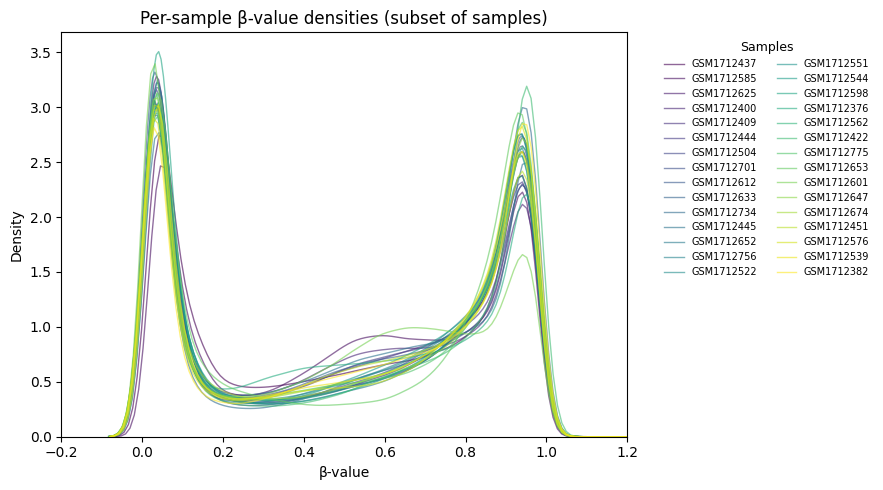

In [9]:
# 1.1 Global β-value density per sample (bimodality check)
warnings.filterwarnings('ignore') 

# Select a subset of samples (rows) for visualization clarity
subset = raw_dataset.sample(n=min(30, raw_dataset.shape[0]), axis=0, random_state=42)
colors = plt.cm.viridis(np.linspace(0, 1, subset.shape[0]))
plt.figure(figsize=(9, 5))

# Plot β-value density for each sample (each row = one sample)
for i, s in enumerate(subset.index):
    sns.kdeplot(
        subset.loc[s].dropna(),
        color=colors[i],
        linewidth=1.0,
        alpha=0.6,
        label=s
    )

# Axis labels and title
plt.xlabel("β-value")
plt.ylabel("Density")
plt.title("Per-sample β-value densities (subset of samples)")
plt.xlim(-0.2, 1.2)

# Legend
plt.legend(
    title="Samples",
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=7,
    title_fontsize=9,
    ncol=2,
    frameon=False
)

plt.tight_layout()
plt.show()

**1.2 Ridge plot by group**

This visualization confirms the **expected bimodal pattern** in all groups but reveals a clear **progressive flattening of the upper methylation peak** from *Normal* to *Tumor* samples.
The shift indicates **global hypomethylation** in tumor tissues—consistent with widespread loss of methylation in cancer—while adjacent samples show intermediate profiles, suggesting early epigenetic drift in peritumoral tissue.

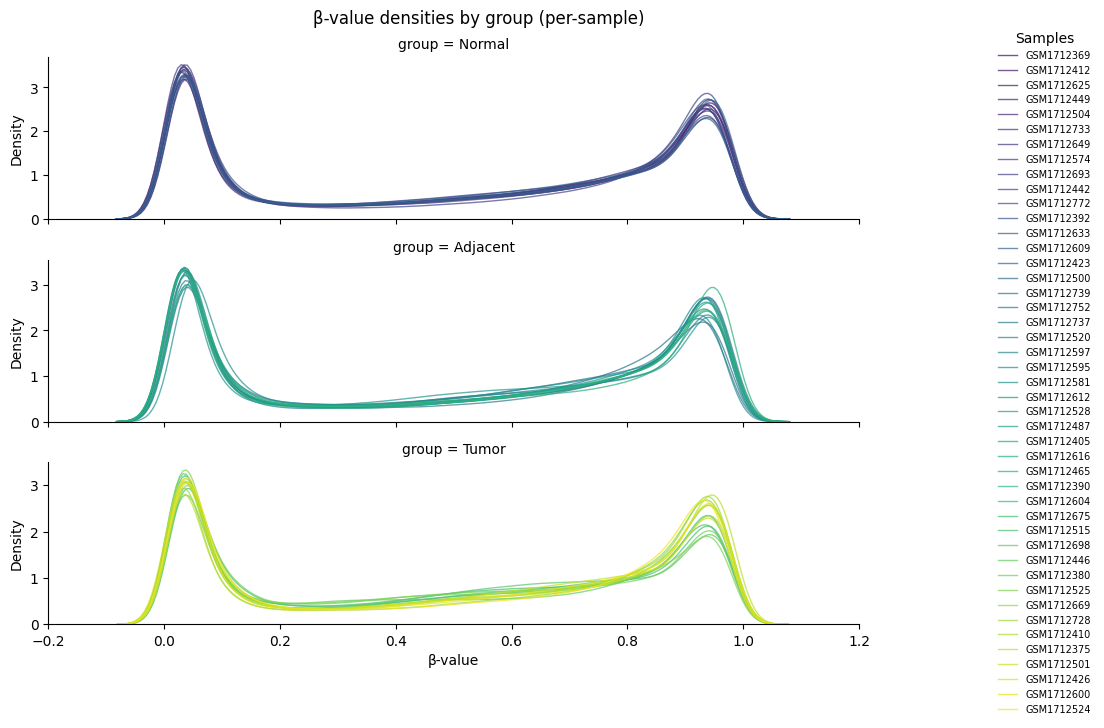

In [10]:
# 1.2 Ridge plot by group (rows = samples, cols = CpGs, 'label' = {0,1,2})
# Each curve = one sample; panels (rows) = groups
warnings.filterwarnings('ignore')  

# Split matrix (BETA) and labels
BETA  = raw_dataset.drop(columns=['label'])
LABEL = raw_dataset['label']
BETA_sub = BETA.sample(n=BETA.shape[1], axis=1, random_state=42)

# Limit number of samples per group for readability
N_PER_GROUP = 15
group_names = {0:'Normal', 1:'Adjacent', 2:'Tumor'}

selected_idx = []
for gcode in [0,1,2]:
    idx_g = LABEL[LABEL==gcode].index
    take = min(N_PER_GROUP, len(idx_g))
    if take > 0:
        selected_idx.extend(np.random.RandomState(42).choice(idx_g, size=take, replace=False))
BETA_sub = BETA_sub.loc[selected_idx]
groups   = LABEL.loc[selected_idx].map(group_names)

# Long format for seaborn
df_long = (BETA_sub
           .reset_index(names='sample')
           .melt(id_vars='sample', var_name='cpg', value_name='beta'))
df_long['group'] = df_long['sample'].map(groups)

unique_samples = df_long['sample'].unique()
palette = sns.color_palette("viridis", n_colors=len(unique_samples))

g = sns.FacetGrid(df_long, row="group", hue="sample",
                  height=2.2, aspect=4, sharex=True, sharey=False,
                  palette=palette)

# Ridge-style KDEs (one density per sample in each group panel)
g.map(sns.kdeplot, "beta", linewidth=1.0, alpha=0.7)

# Axis formatting
g.set(xlim=(-0.2,1.2))
g.set_xlabels("β-value"); g.set_ylabels("Density")
g.fig.subplots_adjust(hspace=0.25)
g.fig.suptitle("β-value densities by group (per-sample)", y=1.02)

# Legend
g.add_legend(title="Samples", bbox_to_anchor=(1.02, 1),
             loc='upper left', frameon=False, ncol=1,
             fontsize=7, title_fontsize=9)

plt.show()

**1.3 Distribution of methylation values per sample or tissue**

The histogram shows the distribution of mean β-values per sample and exhibits the expected **bimodal structure**, with peaks near 0 (unmethylated) and 1 (fully methylated) and a depletion in the intermediate range (β ≈ 0.4–0.6). This pattern reflects the typical behavior of Illumina 450k/EPIC methylation arrays, where most CpG sites occupy near-extreme methylation states rather than intermediate ones. Consequently, global per-sample averages are mainly driven by these two probe classes, and deviations in mean β can signal either global hypomethylation or technical bias. These characteristics are consistent with the array-level behavior described by Maksimovic *et al.* (SWAN normalization) and confirm that the dataset maintains the canonical methylation distribution expected for high-quality array data **[11]**.

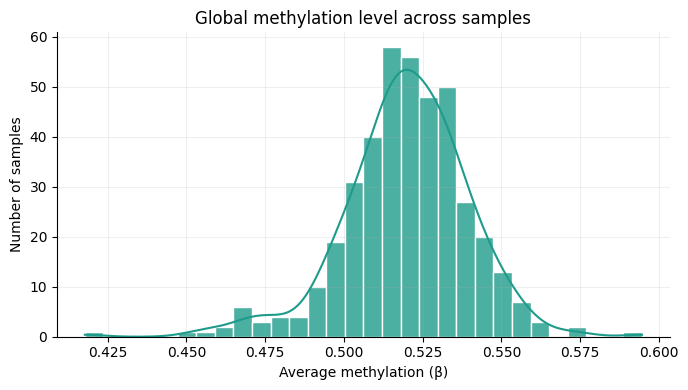

In [11]:
# 1.3 Global methylation level across samples
# Each bar = average β across all CpGs for one sample
warnings.filterwarnings('ignore')

# Compute per-sample mean β
means = raw_dataset.drop(columns=['label']).mean(axis=1)

# Plot histogram + KDE using viridis palette
plt.figure(figsize=(7,4))
sns.histplot(
    means,
    bins=30,
    kde=True,
    color=sns.color_palette("viridis", n_colors=10)[5],
    edgecolor='white',
    alpha=0.8
)

# Axis labels and title
plt.xlabel("Average methylation (β)")
plt.ylabel("Number of samples")
plt.title("Global methylation level across samples")

# Aesthetic refinements
plt.grid(alpha=0.2)
sns.despine()
plt.tight_layout()
plt.show()

**1.4 Per-sample summary: mean β and IQR β by group**

The boxplot reveals a **gradual decrease in the mean β-values** from *Normal* to *Tumor* samples, suggesting a trend toward **global hypomethylation** in cancer tissues.
The **larger dispersion** observed in the tumor group reflects increased methylation heterogeneity, consistent with the stochastic epigenetic deregulation typical of tumorigenic transformation.

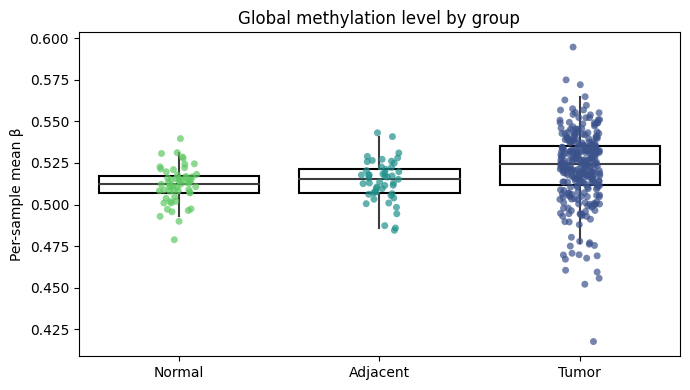

In [15]:
# 1.4 Per-sample summary: mean β and IQR β by group
warnings.filterwarnings('ignore')  

# Split and coerce to numeric
BETA = raw_dataset.drop(columns=['label']).apply(pd.to_numeric, errors='coerce')

# Coerce labels to integers {0,1,2} then map to names
label_raw = pd.to_numeric(raw_dataset['label'], errors='coerce')  # handles '0','1','2','0.0',...
LABEL = label_raw.astype('Int64').map({0:'Normal', 1:'Adjacent', 2:'Tumor'})

# Keep only rows (samples) with a valid label and at least one numeric value
mask_rows = LABEL.notna() & BETA.notna().any(axis=1)
BETA  = BETA.loc[mask_rows]
LABEL = LABEL.loc[mask_rows]

# Per-sample summaries
mean_beta = BETA.mean(axis=1)
iqr_beta  = BETA.quantile(0.75, axis=1) - BETA.quantile(0.25, axis=1)

summary = pd.DataFrame({
    "mean_beta": mean_beta,
    "iqr_beta":  iqr_beta,
    "group":     LABEL
}).dropna()

group_order = ['Normal','Adjacent','Tumor']
palette = sns.color_palette("viridis", n_colors=len(group_order))

plt.figure(figsize=(7,4))
sns.stripplot(
    data=summary, x="group", y="mean_beta",
    hue="group", dodge=False, alpha=0.7,
    order=group_order, palette=palette, legend=False
)
sns.boxplot(
    data=summary, x="group", y="mean_beta",
    order=group_order, showcaps=False, showfliers=False,
    boxprops={'facecolor':'none', 'edgecolor':'black'}
)
plt.ylabel("Per-sample mean β")
plt.xlabel("")
plt.title("Global methylation level by group")
plt.tight_layout()
plt.show()

### 2 — Outlier burden and epigenetic instability

1. **Outlier burden (log10 count per sample)** — Quantifies the number of CpG outliers per sample (baseline = Normal), revealing progressive **epigenetic instability** that increases from *Normal* to *Adjacent* to *Tumor* tissues.

2. **Heatmap of top 100 CpG outliers** — Displays β-values for the CpGs with the highest number of outlier events, highlighting regions of **recurrent stochastic methylation changes**.

3. **Boxplots of top 10 CpGs** — Shows the distribution of β-values for the most outlier-prone CpGs, allowing the detection of **group-specific deviations** (e.g., Tumor-specific hypermethylation).

4. **Volcano-like CpG outlier plot** — Depicts the relationship between **maximum deviation (|Z|)** and **statistical rarity (−log₁₀ p)** per CpG, pinpointing the **most extreme and biologically relevant sites**.

**2.1 Outlier burden (log10 count per sample) [13]** 

This plot quantifies the **sample-level methylation outlier burden**, computed using the robust Z-score approach described by **Seeboth *et al.* (2020)**.
For each CpG, the median and median absolute deviation (MAD) are calculated across the *Normal* reference group to obtain a robust estimate of central tendency and variability.
Each sample’s deviation from this baseline is then expressed as a **robust Z-score**, where (|Z| > 3.5) identifies CpG sites with extreme methylation relative to normal tissue.
The resulting boxplot reveals a clear gradient—**Normal < Adjacent < Tumor**—indicating a progressive accumulation of methylation outliers with increasing disease severity, consistent with the **age- and disease-associated epigenetic instability** reported by Seeboth *et al.* **[13]**.

 **What is a Z-score (standard score)?**

A **Z-score** — or *standard score* — measures how far a data point deviates from the mean of a distribution, expressed in units of standard deviation.
Formally, for a value ($x_i$), the Z-score is defined as:

$$
Z_i = \frac{x_i - \mu}{\sigma}
$$

where ($\mu$) is the mean and ($\sigma$) the standard deviation of the reference population.
It provides a way to **standardize data**, allowing comparisons across different scales or features.
A high absolute value of ($Z_i$) (e.g., ($|Z_i| > 3$)) indicates that the observation is an **outlier**, meaning it lies far from the typical range of values expected under a normal distribution.

In the context of DNA methylation analysis, Z-scores are often computed **per CpG site** relative to a reference group (e.g., *Normal* samples).
This allows detection of **aberrant methylation events** — CpGs that are hyper- or hypomethylated in individual samples compared to the healthy baseline.
When using **robust estimators** (median and MAD instead of mean and standard deviation), the resulting *robust Z-score* is less sensitive to extreme values and better suited for biological data with non-Gaussian noise.

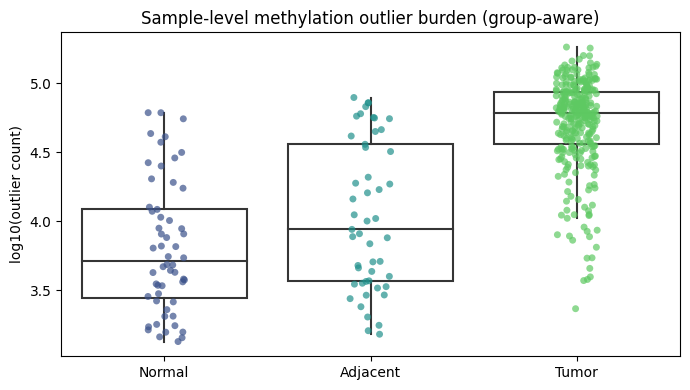

In [16]:
# 2.1 Outlier burden per sample (Seeboth et al., 2020 style)
warnings.filterwarnings('ignore')

# Define the reference distribution = NORMAL group only
REF = BETA.loc[LABEL == 'Normal']

# Median and MAD (robust standard deviation proxy) per CpG
ref_med = REF.median(axis=0)  # per CpG median
ref_mad = (REF - ref_med).abs().median(axis=0) * 1.4826  # robust σ estimate

# Compute robust Z-scores for all samples
Z = (BETA - ref_med) / ref_mad.replace(0, np.nan)

# Count outliers per sample (|Z| > 3.5)
outlier_mask = Z.abs() > 3.5
outlier_count = outlier_mask.sum(axis=1)

# Create dataframe with log10(outlier count)
ob_df = pd.DataFrame({
    "sample": BETA.index,
    "group": LABEL,
    "outliers": outlier_count
})
ob_df["log10_outliers"] = np.log10(ob_df["outliers"].replace(0, np.nan))

# Plot
palette = sns.color_palette("viridis", n_colors=3)

plt.figure(figsize=(7,4))
sns.boxplot(
    data=ob_df, x="group", y="log10_outliers",
    order=group_order, palette=palette,
    showcaps=False, showfliers=False, boxprops={'facecolor':'none'}
)
sns.stripplot(
    data=ob_df, x="group", y="log10_outliers",
    order=group_order, palette=palette, alpha=0.7, size=5
)

plt.ylabel("log10(outlier count)")
plt.xlabel("")
plt.title("Sample-level methylation outlier burden (group-aware)")
plt.tight_layout()
plt.show()

**2.2 Heatmap of top 100 CpG outliers**

The heatmap illustrates the **top 100 CpG sites** exhibiting the highest number of outlier events, identified using an **IQR-based rule** — values beyond 3×IQR from the first (Q1) or third (Q3) quartile are flagged as outliers.
The **interquartile range (IQR)** provides a robust measure of spread, resistant to extreme values, and thus offers a reliable baseline for detecting aberrant methylation in noisy genomic data.

The resulting pattern is **highly heterogeneous**, showing CpGs with recurrent extreme β-values across subsets of samples and others with more sporadic deviations.
This mosaic architecture suggests that methylation variability arises from **localized epigenetic disruptions** rather than uniform global shifts.
Such recurrent, sample-specific CpG outliers are consistent with **epigenetic field defects** — early lesions that predate tumor formation — as discussed in Seeboth *et al.* (2020) **[13]**.

Outlier-based screening using the IQR criterion is a **pragmatic first step** for identifying candidate CpGs of biological relevance; however, individual loci should later be aggregated into **regional analyses** (e.g., DMRs) to confirm reproducibility and functional significance, following best practices highlighted in Maksimovic *et al.* (2012) and Benelli *et al.* (2021) **[12, 14]**.


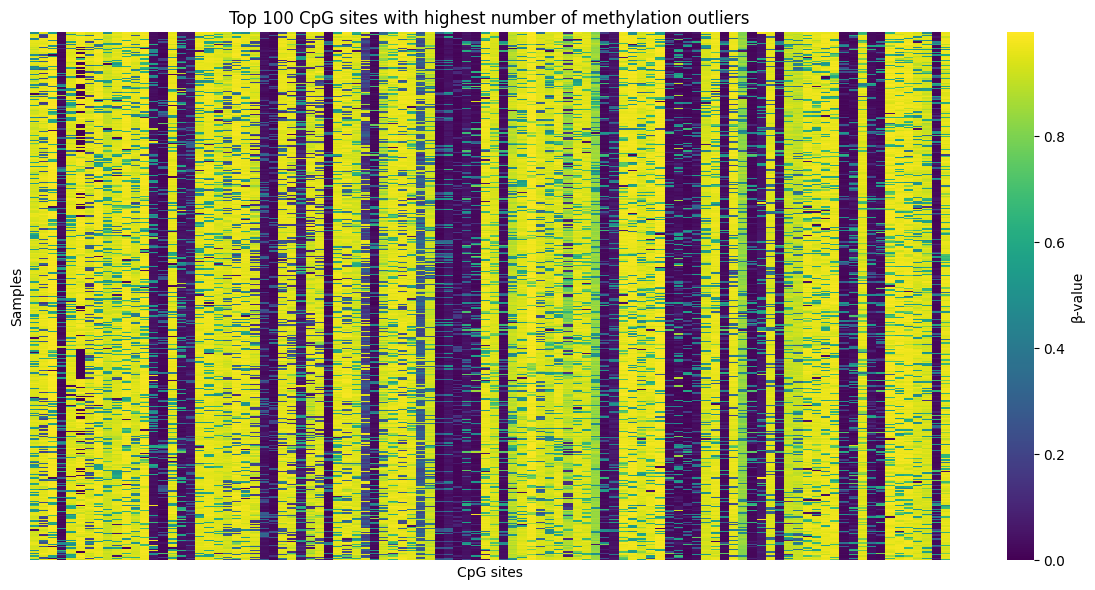

In [17]:
# 2.2 Heatmap of top-100 CpG sites with the highest number of outliers
# Based on 3×IQR rule (computed column-wise across samples)

warnings.filterwarnings('ignore')

# Remove label column before computing quantiles
BETA = raw_dataset.drop(columns=['label'])

# Compute IQR-based outlier thresholds per CpG (column-wise)
Q1 = BETA.quantile(0.25)
Q3 = BETA.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers (values outside [Q1 - 3*IQR, Q3 + 3*IQR])
outliers = (BETA < (Q1 - 3 * IQR)) | (BETA > (Q3 + 3 * IQR))

# Count number of outlier samples per CpG
outlier_counts = outliers.sum().sort_values(ascending=False)

# Select top 100 CpG sites with most outliers
TOP_N = 100
top_cpgs = outlier_counts.head(TOP_N).index

# Heatmap visualization using viridis
plt.figure(figsize=(12, 6))
sns.heatmap(
    BETA[top_cpgs],
    cmap="viridis",              
    cbar_kws={'label': 'β-value'},
    yticklabels=False,
    xticklabels=False
)

plt.title("Top 100 CpG sites with highest number of methylation outliers", fontsize=12)
plt.xlabel("CpG sites")
plt.ylabel("Samples")
plt.tight_layout()
plt.show()

**2.3 Boxplots of top-10 CpGs with the highest number of outliers**

**The boxplot visualization highlights the β-value distributions for the ten CpG sites with the highest number of detected outliers**, providing a compact view of variability and central tendency across the dataset.
The **interquartile ranges (IQRs)** and whiskers illustrate how dispersion differs among loci, while the numerous **individual dots outside the whiskers** mark CpGs exhibiting strong deviations from the norm—potential signatures of epigenetic deregulation.
CpGs tightly clustered near β ≈ 1 or β ≈ 0 represent stably methylated or unmethylated sites, whereas those with broader spreads reveal **sample-specific or subgroup-specific methylation shifts**, possibly reflecting early or localized tumor-associated changes.
This plot thus helps **prioritize CpG loci with heterogeneous methylation profiles**, suggesting candidates for further investigation as potential **biomarkers of cancer-related epigenetic instability**.

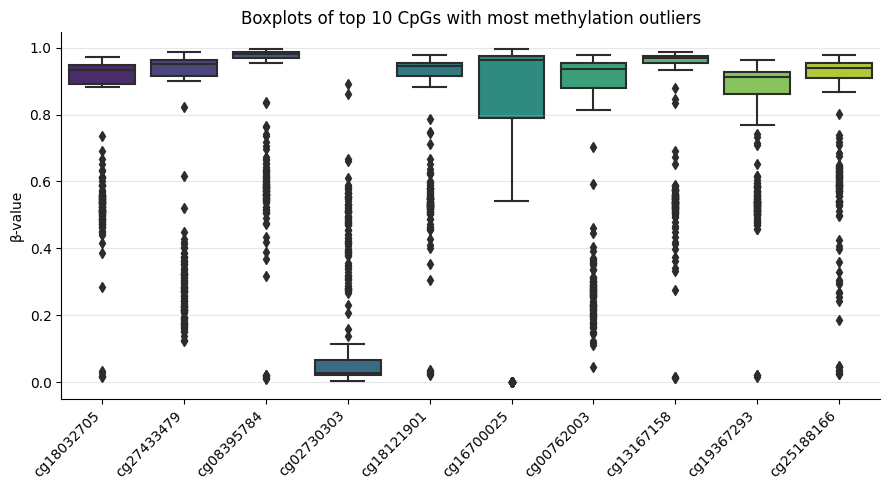

In [18]:
# 2.3 Boxplots of top-10 CpGs with the highest number of outliers
warnings.filterwarnings('ignore')

# Remove label column
BETA = raw_dataset.drop(columns=['label'])

# Compute IQR-based outlier mask
outliers = (BETA < (Q1 - 3 * IQR)) | (BETA > (Q3 + 3 * IQR))

# Select top 10 CpGs with most outlier samples
outlier_counts = outliers.sum().sort_values(ascending=False)
top_cpgs = outlier_counts.head(10).index

# Prepare data for plotting
df_long = BETA[top_cpgs].melt(var_name='CpG', value_name='beta')

# Plot boxplots 
plt.figure(figsize=(9,5))
sns.boxplot(
    data=df_long,
    x="CpG", y="beta",
    palette=sns.color_palette("viridis", n_colors=len(top_cpgs))
)

# Aesthetic details
plt.xticks(rotation=45, ha='right')
plt.ylabel("β-value")
plt.xlabel("")
plt.title("Boxplots of top 10 CpGs with most methylation outliers")
plt.grid(axis='y', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()


**2.4 Volcano-like plot of CpG outliers (robust Z vs p-value)**

**The volcano-like scatter plot** provides an exploratory overview of CpG sites exhibiting extreme deviations in methylation intensity, combining **effect magnitude** (x-axis: maximum absolute Z-score per CpG) and **statistical significance** (y-axis: −log₁₀ of approximated p-value).
Here, the **Z-score** quantifies how far a CpG’s methylation value lies from the median in units of the **Median Absolute Deviation (MAD)**, a robust alternative to the standard deviation that reduces the influence of extreme values.
This transformation standardizes methylation deviations across CpGs, allowing comparison of their relative instability.

The p-values are heuristically approximated through rank-based scaling rather than formal hypothesis testing, meaning the resulting −log₁₀(p) axis reflects **relative extremeness** rather than exact statistical significance.
Despite this simplification, the plot remains useful for identifying **CpGs with exceptionally high deviation magnitudes** (rightmost points), which are likely to represent true biological outliers rather than random noise.

The clustering of most points within a narrow −log₁₀(p) range indicates that few CpGs reach both high deviation and strong statistical support—suggesting **widespread low-level variability** with a limited number of high-impact events.
This pattern is consistent with the concept of **localized epigenetic instability** rather than global methylation drift, in line with previous studies on methylation outlier burden **[13, 14]**.

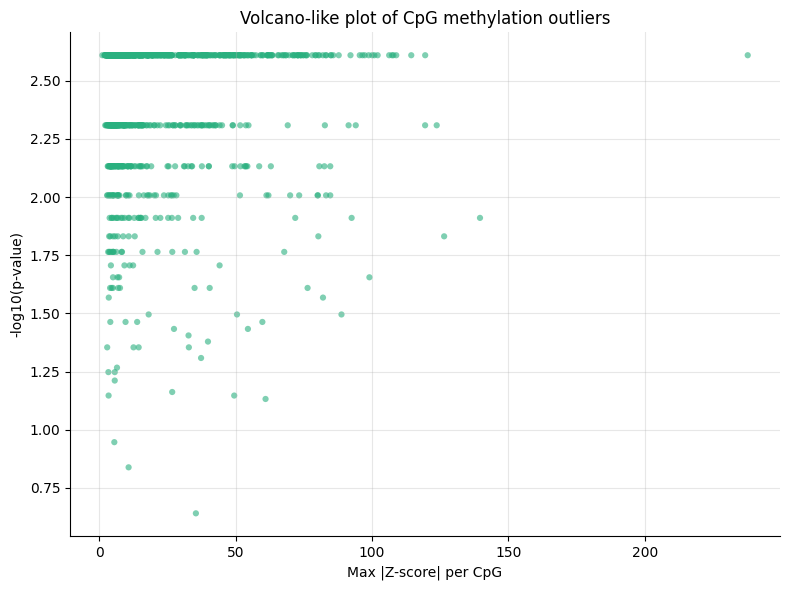

In [19]:
# 2.4 Volcano-like plot of CpG outliers (robust Z vs p-value)
warnings.filterwarnings('ignore')

# Remove label column
BETA = raw_dataset.drop(columns=['label'])

# Median and MAD per CpG (column-wise)
median = BETA.median(axis=0)
mad = BETA.apply(lambda x: median_abs_deviation(x, scale='normal'), axis=0).replace(0, np.nan)

# Robust Z-score per CpG per sample
z = (BETA - median) / mad

# Approximate two-sided p-values (rank-based heuristic)
p_values = 2 * (1 - np.abs(z).rank(axis=0) / len(z))

# Aggregate per CpG
max_z = z.abs().max(axis=0)
max_p = p_values.min(axis=0)  # min p-value across samples (more intuitive than max)

# Volcano-like scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=max_z,
    y=-np.log10(max_p),
    s=20,
    alpha=0.6,
    color=sns.color_palette("viridis", n_colors=10)[6],
    edgecolor='none'
)

# Axes labels and styling
plt.xlabel("Max |Z-score| per CpG")
plt.ylabel("-log10(p-value)")
plt.title("Volcano-like plot of CpG methylation outliers")
plt.grid(alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()


### 3 — Group-level contrasts (Tumor vs Normal)

1. **Δβ distribution (Tumor − Normal)** — Shows the distribution of methylation differences between Tumor and Normal groups across all CpG sites.
   Positive Δβ values correspond to **hypermethylated CpGs in Tumor**, whereas negative values indicate **hypomethylated sites**, providing a genome-wide snapshot of **epigenetic shifts** associated with tumorigenesis.

2. **Heatmap of top variable CpGs (MAD)** — Displays a clustered heatmap of the **top 1000 most variable CpGs**, ranked by Median Absolute Deviation (MAD).
   Rows represent samples and columns represent CpG sites, with color annotations marking group membership (Normal, Adjacent, Tumor).
   This visualization highlights **coordinated methylation variability** and potential **subgroup-specific patterns**, offering insights into the heterogeneity of tumor epigenomes.

**3.1 Δβ distribution (Tumor vs Normal) per CpG**

The **Δβ distribution plot** provides a genome-wide view of methylation differences between Tumor and Normal tissues, computed as the per-CpG mean β-value difference (Δβ = β_Tumor − β_Normal).
The sharp peak centered near zero indicates that **most CpG sites exhibit minimal methylation change**, consistent with the notion that only a subset of loci undergo significant epigenetic remodeling in cancer.
The slightly asymmetric tails suggest the coexistence of **both hypermethylated and hypomethylated CpGs**, with the broader negative side hinting at a mild predominance of **global hypomethylation**, a well-documented hallmark of tumorigenesis.
This visualization thus offers an initial, quantitative picture of **directional methylation shifts** across the genome, before focusing on region-specific or functional analyses.


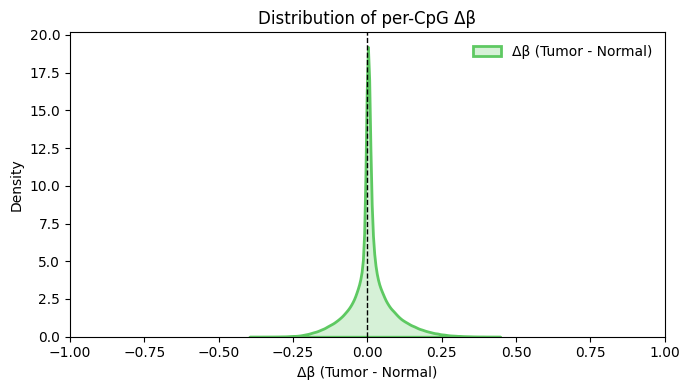

In [20]:
# 3.1 Δβ distribution (Tumor vs Normal) per CpG
warnings.filterwarnings('ignore')

# Per-CpG group means across samples (row-wise aggregation)
tum = BETA[LABEL == 'Tumor'].mean(axis=0)    # mean β per CpG in Tumor
nor = BETA[LABEL == 'Normal'].mean(axis=0)   # mean β per CpG in Normal

# Δβ for each CpG (Tumor - Normal)
delta = tum - nor  # pandas Series indexed by CpG

# Plot KDE of Δβ with viridis
plt.figure(figsize=(7,4))
sns.kdeplot(delta.dropna(), linewidth=2, fill=True, alpha=0.25,
            color=sns.color_palette("viridis", n_colors=3)[-1], label="Δβ (Tumor - Normal)")

# Zero reference line and limits
plt.axvline(0, linestyle="--", linewidth=1, color='black')
plt.xlim(-1, 1)

# Labels and title
plt.xlabel("Δβ (Tumor - Normal)")
plt.ylabel("Density")
plt.title("Distribution of per-CpG Δβ")
plt.legend(frameon=False)
plt.tight_layout()
plt.show()


**3.2 Most variable CpGs (top-MAD) + annotated heatmap**

The **heatmap of the top variable CpGs (ranked by MAD)** visualizes the methylation landscape of the most heterogeneous sites across all samples, after z-score normalization per CpG.
Distinct vertical patterns indicate CpG subsets that co-vary across individuals, while the hierarchical clustering along the y-axis reveals **sample-level structure** aligned with biological grouping: Tumor samples (in yellow) tend to cluster together, separating from Normal (purple) and Adjacent (teal) tissues.
This segregation suggests that **epigenetic variability is not random**, but rather structured and biologically meaningful—reflecting tumor-specific deregulation at selected genomic regions.
The presence of intermediate Adjacent profiles further supports the concept of **field cancerization**, where epigenetic alterations extend beyond overt tumor tissue, bridging normal and malignant states.

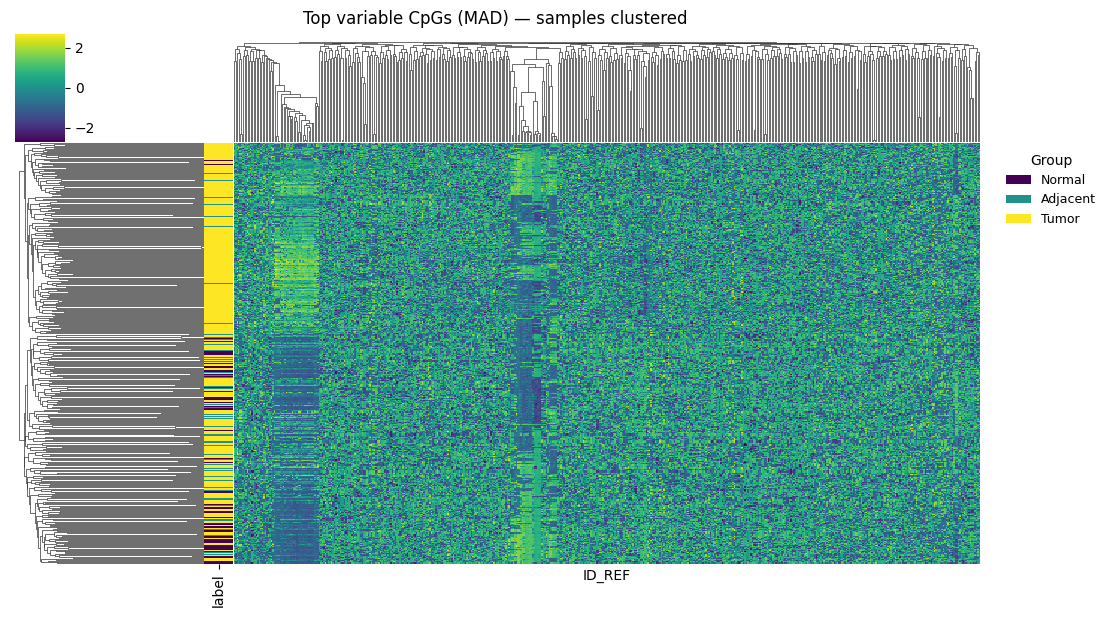

In [23]:
# 3.2 Most variable CpGs (top-MAD) + annotated heatmap
warnings.filterwarnings('ignore')

# Compute MAD manually per CpG (column-wise)
mad_per_cpg = (BETA - BETA.mean()).abs().mean(axis=0)

# Select top variable CpGs
TOP_N = 500
top_cpgs = mad_per_cpg.nlargest(min(TOP_N, BETA.shape[1])).index
X = BETA.loc[:, top_cpgs]

# Row color annotations by group
group_palette = {'Normal':'#440154', 'Adjacent':'#21918c', 'Tumor':'#fde725'}
row_colors = LABEL.map(group_palette)

# Cluster heatmap
g = sns.clustermap(
    X,
    metric="correlation",
    z_score=1,                  # standardize columns (CpGs)
    cmap="viridis",             # consistent color scheme
    row_colors=row_colors,
    figsize=(10, 6),
    xticklabels=False,
    yticklabels=False
)

# Add title and legend
g.fig.suptitle("Top variable CpGs (MAD) — samples clustered", y=1.02, fontsize=12)
handles = [Patch(facecolor=col, edgecolor='none', label=lab) for lab, col in group_palette.items()]
g.ax_heatmap.legend(
    handles=handles, title="Group",
    loc='upper left', bbox_to_anchor=(1.02, 1.0),
    frameon=False, fontsize=9, title_fontsize=10
)

plt.show()

### 4 — Dimensionality reduction and global structure

1. **t-SNE (PCA → 50D)** — Applies a non-linear dimensionality reduction to project high-dimensional methylation profiles into a 2D space, after initial compression to 50 principal components.
   The t-SNE algorithm preserves **local similarity** between samples, enabling the visualization of clusters or transitions among groups.
   A clear separation between *Normal* and *Tumor* samples, with *Adjacent* tissues positioned in between, would indicate a **continuous epigenetic gradient** consistent with progressive tumor-associated methylation reprogramming.

**4.1 t-SNE using ALL ~480k CpGs**

The **t-SNE projection**, computed after a 50-component PCA reduction, provides a non-linear, two-dimensional representation of genome-wide methylation profiles based on **M-values** (see preprocessing details in [02-data-pre-processing.ipynb](https://github.com/elisabettaroviera/THESIS/blob/main/01%20-%20Notebook/02-data-pre-processing.ipynb)).
The visualization clearly separates *Normal* and *Tumor* samples, with *Adjacent* tissues positioned in an intermediate region, suggesting a **continuous epigenetic gradient** between healthy and cancerous states.
This structure confirms that large-scale methylation variability carries **biological signal** reflecting tumor progression and tissue proximity effects.

From a mathematical standpoint, **Principal Component Analysis (PCA)** is a linear transformation that projects the data matrix ( $X \in \mathbb{R}^{n \times p}$ ) onto an orthogonal basis of directions maximizing variance.
Formally, it decomposes ( X ) as
$$
X = U \Sigma V^T,
$$
where ( V ) contains the eigenvectors of the covariance matrix ( $X^TX$ ).
The first ( k ) components capture the largest sources of variance, yielding a low-dimensional approximation ( $X_k = U_k \Sigma_k V_k^T$ ).
In practice, the **IncrementalPCA** implementation from *scikit-learn / SciPy* efficiently performs this decomposition on large, high-dimensional datasets by processing chunks sequentially. **[15]**

The **t-Distributed Stochastic Neighbor Embedding (t-SNE)** algorithm then maps the reduced data to a 2D space by minimizing the Kullback–Leibler divergence between probability distributions of pairwise similarities in the high- and low-dimensional spaces.
It preserves **local neighborhood structure**, making it well suited to highlight **non-linear relationships** and cluster continuity in methylation data.
In this context, the clear topological ordering of *Normal → Adjacent → Tumor* supports the hypothesis of **progressive methylome remodeling** in breast cancer. **[16]**

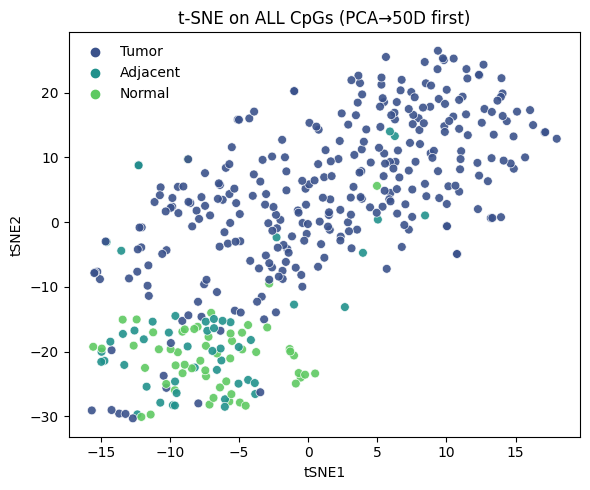

In [25]:
# 4.1 t-SNE using ALL ~480k CpGs (memory-aware): PCA(50) -> t-SNE(2)
warnings.filterwarnings('ignore')

# Split and cast to float32 to save RAM
BETA  = raw_dataset.drop(columns=['label']).astype(np.float32)
LABEL = raw_dataset['label'].map({0:'Normal', 1:'Adjacent', 2:'Tumor'})

# Work on M-values for distances; keep β for plotting if needed
Beta_clip = np.clip(BETA, 1e-6, 1 - 1e-6)
M = np.log2(Beta_clip / (1 - Beta_clip))

# Column-center to remove global offsets (per-CpG)
M_centered = M - M.mean(axis=0)

# Incremental PCA to 50D (handles wide matrices well)
ipca = IncrementalPCA(n_components=50, batch_size=5000)
X_pca = ipca.fit_transform(M_centered)

# t-SNE on PCA space (stable params for ~400 samples)
tsne = TSNE(
    n_components=2,
    init='pca',
    perplexity=30,
    learning_rate=300,
    early_exaggeration=12,
    n_iter=1500,
    metric='euclidean',
    random_state=42
)
X_tsne = tsne.fit_transform(X_pca)

# Plot
emb = pd.DataFrame(X_tsne, columns=["tSNE1","tSNE2"], index=BETA.index)
emb["group"] = LABEL

plt.figure(figsize=(6,5))
sns.scatterplot(
    data=emb, x="tSNE1", y="tSNE2",
    hue="group", palette="viridis", s=40, alpha=0.9
)
plt.title("t-SNE on ALL CpGs (PCA→50D first)")
plt.legend(frameon=False)
plt.tight_layout(); plt.show()

## **Conclusion**

The exploratory analysis provided an initial quantitative and visual characterization of the methylation landscape in the *GSE69914* dataset, revealing consistent biological and statistical patterns across multiple visualization strategies.
Global β-value density plots confirmed the expected **bimodal distribution** typical of array-based methylation data, while group-specific ridge plots highlighted **systematic shifts** in methylation profiles, with *Tumor* samples showing moderate global hypomethylation compared to *Normal* tissues.
Sample-level summaries (mean β vs IQR) and outlier-burden analyses reproduced trends described in **[13]**, suggesting a **progressive accumulation of stochastic methylation variability** from Normal → Adjacent → Tumor, consistent with the concept of **epigenetic instability** in cancer.

At the CpG-specific level, heatmaps and boxplots of top outlier sites exposed a subset of **recurrently variable loci**, potentially representing early-stage epigenetic deregulation or field effects.
The Δβ distribution (Tumor–Normal) confirmed a mild global **hypomethylation bias**, while the MAD-based heatmap revealed coordinated, region-level methylation shifts that segregate by tissue type, suggesting **structured and biologically driven alterations** rather than random noise.
Finally, dimensionality-reduction methods (PCA → t-SNE) provided a **non-linear embedding** of the global methylation space, successfully separating Normal and Tumor groups, with Adjacent tissues occupying an intermediate position — a pattern consistent with **progressive methylome remodeling**.

Overall, this notebook establishes a solid foundation for the forthcoming *data pre-processing* phase, where normalization (e.g., **SWAN**) and batch correction (e.g., **ComBat**) will be applied.
These procedures will refine the signal-to-noise ratio and enable more precise identification of **differentially methylated regions (DMRs)** using methods such as **Rocker-meth**, followed by biological interpretation.

A **possible direction** for future analysis—still at a conceptual stage—is the statistical characterization of stochastic processes underlying the three sample contexts (Tumor, Tumor-adjacent, and Normal).
The goal would be to explore whether methylation profiles could, in principle, be viewed as samples drawn from distinct underlying distributions, potentially using approaches such as β- or mixture-β models, nonparametric two-sample tests (e.g., KS/AD tests, kernel MMD), or likelihood-based comparisons.
Although this direction is not yet concretely defined, investigating such distributional differences could help clarify whether specific CpG sites behave in a **group-dependent manner**.
If preliminary evidence were to support this hypothesis, these insights could guide both **visualization choices** and **targeted outlier-detection strategies**, helping to highlight CpG loci of greater biological relevance.
At present, this remains an **open and exploratory idea**, rather than a confirmed methodological step.

## **References**

[1] National Institutes of Health (US) and Biological Sciences Curriculum Study, *Understanding Cancer*. Bethesda, MD, USA: National Institutes of Health (US), 2007. [Online]. Available: [https://www.ncbi.nlm.nih.gov/books/NBK20362/](https://www.ncbi.nlm.nih.gov/books/NBK20362/)

[2] D. Hanahan and R. A. Weinberg, “The hallmarks of cancer,” *Cell*, vol. 100, no. 1, pp. 57–70, Jan. 2000.

[3] G. Menon, F. M. Alkabban, and T. Ferguson, “Breast Cancer,” in *StatPearls* [Internet]. Treasure Island, FL, USA: StatPearls Publishing, Jan. 2025–. [Online]. Available: [https://www.ncbi.nlm.nih.gov/books/NBK482286/](https://www.ncbi.nlm.nih.gov/books/NBK482286/)

[4] A. Bird, “DNA methylation patterns and epigenetic memory,” *Genes & Development*, vol. 16, no. 1, pp. 6–21, Jan. 2002.

[5] J. J. S. Wilcox, J. Ord, D. Kappei, and T. I. Gossmann, “The CpG Landscape of Protein Coding DNA in Vertebrates,” *Evolutionary Applications*, 2025.

[6] National Center for Biotechnology Information, “GSE69914 on GEO Datasets,” *Gene Expression Omnibus (GEO)*, 2015. [Online]. Available: [https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE69914](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE69914)

[7] National Cancer Institute, “BRCA Gene Changes: Cancer Risk and Genetic Testing,” *National Institutes of Health*, Jul. 19, 2024. [Online]. Available: [https://www.cancer.gov/about-cancer/causes-prevention/genetics/brca-fact-sheet](https://www.cancer.gov/about-cancer/causes-prevention/genetics/brca-fact-sheet)

[8] M. Ehrlich, “DNA methylation in cancer: too much, but also too little,” *Oncogene*, vol. 21, no. 35, pp. 5400–5413, Aug. 2002.

[9] W. Zhou, P. W. Laird, and H. Shen, “Comprehensive characterization, annotation and innovative use of Infinium DNA methylation BeadChip probes,” *Nucleic Acids Research*, vol. 45, no. 4, e22, 2016. [Online]. Available: [https://doi.org/10.1093/nar/gkw967](https://doi.org/10.1093/nar/gkw967)

[10] P. Du, X. Zhang, C.-C. Huang, N. Jafari, W. A. Kibbe, L. Hou, and S. M. Lin, “Comparison of Beta-value and M-value methods for quantifying methylation levels by microarray analysis,” *BMC Bioinformatics*, vol. 11, p. 587, 2010.

[11] J. Maksimovic, L. Gordon, and A. Oshlack, “SWAN: Subset-quantile Within Array Normalization for Illumina Infinium HumanMethylation450 BeadChips,” *Genome Biology*, vol. 13, no. 6, p. R44, 2012.

[12] A. E. Teschendorff *et al.*, “DNA methylation outliers in normal breast tissue identify field defects that are enriched in cancer,” *Nature Communications*, vol. 7, Article 10478, 2016.

[13] F. Seeboth *et al.*, “DNA methylation outlier burden, health and ageing in Generation Scotland and Lothian Birth Cohorts,” *Clinical Epigenetics*, vol. 12, no. 1, p. 103, 2020.

[14] G. Benelli, G. Franceschini, A. Magi, A. Romagnoli, U. Biagioni, G. Migliaccio, L. Malorni, and F. Demichelis, “Charting differentially methylated regions in cancer with Rocker-meth,” *Communications Biology*, vol. 4, no. 1, p. 1249, Dec. 2021.

[15] F. Pedregosa *et al.*, “Scikit-learn: Machine Learning in Python,” *Journal of Machine Learning Research*, vol. 12, pp. 2825–2830, 2011.

[16] L. van der Maaten and G. Hinton, “Visualizing data using t-SNE,” *Journal of Machine Learning Research*, vol. 9, pp. 2579–2605, 2008.